Chapter 18

# 高斯函数积分
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的核心在于计算和可视化函数

$$
f(x) = e^{-x^2}
$$

在不同区间上的积分，展示了其定积分和累积积分的特性。

1. **定积分计算**：代码首先计算 $f(x)$ 在有限区间 $[a, b]$ 上的定积分，给出在该区间内 $f(x)$ 与 $x$ 轴之间的面积。定积分通过两个方式计算，一是利用不定积分的结果 $F(x)$，即 $f(x)$ 的原函数，在 $a$ 和 $b$ 上求值差：

   $$
   \int_a^b f(x) \, dx = F(b) - F(a)
   $$

   二是直接调用定积分函数，并将此定积分区域用颜色填充在图上以直观展示。

2. **累积积分计算**：代码进一步计算 $f(x)$ 从负无穷到变量 $t$ 的累积积分，即：

   $$
   F(t) = \int_{-\infty}^t f(x) \, dx
   $$

   这表示函数从 $x = -\infty$ 到 $x = t$ 的积分面积，随着 $t$ 的增大，$F(t)$ 逐渐积累更多的面积，趋于稳定。代码通过在不同 $t$ 值上的计算，绘制出累积积分曲线，展示 $F(t)$ 随 $t$ 的变化趋势。

这种可视化不仅揭示了 $f(x)$ 的定积分在特定区间上的面积，还展示了累积积分如何随着 $t$ 的增大而逐渐趋近极限。通过这些积分的计算，代码有效地呈现了高斯函数在积分中的行为特点。

## 导入包

In [1]:
import numpy as np
from sympy import *  # 导入符号计算库
from matplotlib import pyplot as plt  # 导入绘图库

In [2]:
x = Symbol('x')  # 定义符号变量 x

## 定义函数和积分

In [3]:
f_x = exp(-x**2)  # 定义函数 f(x) = exp(-x^2)
f_x

exp(-x**2)

In [4]:
integrate(f_x, (x, -oo, oo))  # 计算 f(x) 在 (-∞, ∞) 上的定积分

sqrt(pi)

In [5]:
integrate(exp(-x**2 / 2), (x, -oo, oo))  # 计算 exp(-x^2 / 2) 在 (-∞, ∞) 上的定积分

sqrt(2)*sqrt(pi)

In [6]:
f_x_fcn = lambdify([x], f_x)  # 将符号函数转换为数值函数

In [7]:
integral_f_x = integrate(f_x, x)  # 计算 f(x) 的不定积分
integral_f_x

sqrt(pi)*erf(x)/2

In [8]:
integral_f_x_fcn = lambdify([x], integral_f_x)  # 将不定积分转换为数值函数

In [9]:
a = -0.5  # 积分下限
b = 1  # 积分上限

In [10]:
num = 201  # 网格数量
x_array = np.linspace(-3, 3, num)  # x 的取值范围
x_a_b_array = np.linspace(a, b, num)  # 积分区间内的 x 取值范围

In [11]:
y_array = f_x_fcn(x_array)  # 计算函数在 x_array 上的值
y_a_b_array = f_x_fcn(x_a_b_array)  # 计算函数在积分区间 [a, b] 内的值

## 计算定积分值

In [12]:
integral_a_b = integral_f_x_fcn(b) - integral_f_x_fcn(a)  # 使用不定积分计算积分值
integral_a_b

1.2081051392252193

In [13]:
integral_a_b_v2 = integrate(f_x, (x, a, b))  # 使用定积分公式计算积分值
integral_a_b_v2

0.260249938906523*sqrt(pi) + sqrt(pi)*erf(1)/2

In [14]:
integral_a_b_v2 = float(integral_a_b_v2)  # 将结果转换为浮点数
integral_a_b_v2

1.2081051392252196

## 绘制函数和积分区间

Text(0.5, 1.0, '$\\int_a^b  f(x) = 1.208$')

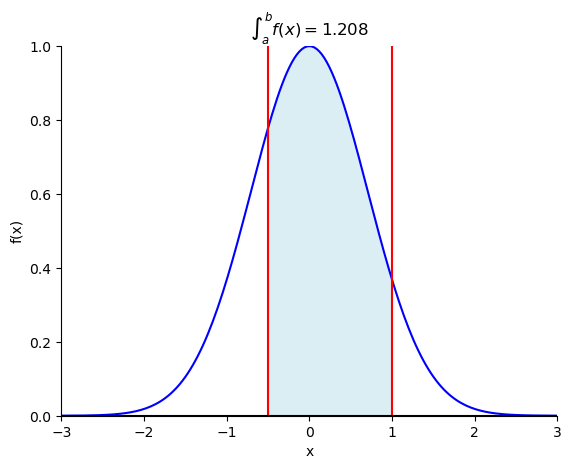

In [15]:
fig, ax = plt.subplots()
ax.plot(x_array, y_array, 'b')  # 绘制函数曲线
ax.axvline(x=a, color='r', linestyle='-')  # 绘制积分下限 a
ax.axvline(x=b, color='r', linestyle='-')  # 绘制积分上限 b
ax.axhline(y=0, color='k', linestyle='-')  # 添加 y=0 参考线

ax.fill_between(x_a_b_array,
                y_a_b_array, 
                edgecolor='none', 
                facecolor='#DBEEF3')  # 在积分区间 [a, b] 内填充颜色

ax.set_xlim(x_array.min(), x_array.max())  # 设置 x 轴范围
ax.set_ylim(np.floor(y_array.min()), 
            np.ceil(y_array.max()))  # 设置 y 轴范围
plt.gca().spines['right'].set_visible(False)  # 隐藏右边框
plt.gca().spines['top'].set_visible(False)  # 隐藏上边框
ax.set_xlabel('x')  # 设置 x 轴标签
ax.set_ylabel('f(x)')  # 设置 y 轴标签
ax.set_title(r'$\int_a^b  f(x) = %0.3f$' % integral_a_b)  # 在标题中显示积分结果

## 绘制累积积分函数

In [16]:
t = Symbol('t')  # 定义符号变量 t

In [17]:
integral_f_x_oo_t = integrate(f_x, (x, -oo, t))  # 计算从负无穷到 t 的累积积分
integral_f_x_oo_t

sqrt(pi)*erf(t)/2 + sqrt(pi)/2

In [18]:
integral_f_x_oo_t_fcn = lambdify([t], integral_f_x_oo_t)  # 将累积积分转换为数值函数

In [19]:
t_array = np.linspace(-3, 3, num)  # 定义 t 的取值范围

In [22]:
integral_f_x_oo_t_array = integral_f_x_oo_t_fcn(t_array)  # 计算累积积分函数在 t_array 上的值
# integral_f_x_oo_t_array

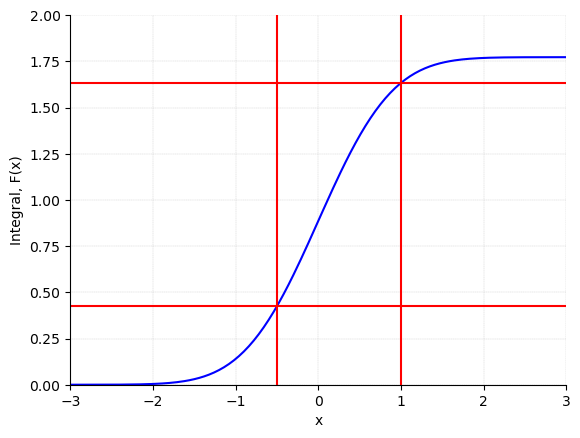

In [21]:
fig, ax = plt.subplots()
ax.plot(t_array, integral_f_x_oo_t_array, 'b')  # 绘制累积积分函数曲线
ax.axvline(x=a, color='r', linestyle='-')  # 标记积分下限 a
ax.axvline(x=b, color='r', linestyle='-')  # 标记积分上限 b

ax.axhline(y=integral_f_x_oo_t_fcn(a), 
           color='r', linestyle='-')  # 绘制积分值在 a 处的水平线

ax.axhline(y=integral_f_x_oo_t_fcn(b), 
           color='r', linestyle='-')  # 绘制积分值在 b 处的水平线

ax.set_xlim(t_array.min(), t_array.max())  # 设置 t 轴范围
ax.set_ylim(np.floor(integral_f_x_oo_t_array.min()), 
            np.ceil(integral_f_x_oo_t_array.max()))  # 设置 y 轴范围
plt.gca().spines['right'].set_visible(False)  # 隐藏右边框
plt.gca().spines['top'].set_visible(False)  # 隐藏上边框
ax.set_xlabel('x')  # 设置 x 轴标签
ax.set_ylabel('Integral, F(x)')  # 设置 y 轴标签
ax.grid(linestyle='--', linewidth=0.25, color=[0.75, 0.75, 0.75])  # 添加网格